<a href="https://colab.research.google.com/github/akhmad-ardi/Subject_Recommendation_System/blob/main/Subject_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Rekomendasi Mata Pelajaran

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download dataset from kaggle
path = kagglehub.dataset_download("noorsaeed/student-studeis-recommendation")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/noorsaeed/student-studeis-recommendation/versions/1


## Exploratory Data Analysis

In [3]:
df = pd.read_csv(f"{path}/student-scores.csv")

df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### Info dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

Variabel pada dataset:

1. id: ID unik untuk setiap siswa.
2. first_name: Nama depan siswa.
3. last_name: Nama belakang siswa.
4. email: Email siswa.
5. gender: Jenis kelamin siswa (male/female).
6. part_time_job: Menunjukkan apakah siswa memiliki pekerjaan paruh waktu (True/False).
7. absence_days: Jumlah hari siswa tidak hadir.
8. extracurricular_activities: Menunjukkan apakah siswa berpartisipasi dalam kegiatan ekstrakurikuler (True/False).
9. weekly_self_study_hours: Jumlah jam yang dihabiskan siswa untuk belajar mandiri per pekan.
10. career_aspiration: Jalur karier yang diharapkan dari siswa.
11. math_score: Skor yang dicapai siswa dalam matematika.
12. history_score:  Skor yang dicapai siswa dalam sejarah.
13. physics_score:  Skor yang dicapai siswa dalam fisika.
14. chemistry_score:  Skor yang dicapai siswa dalam kimia.
15. biology_score:  Skor yang dicapai siswa dalam biologi.
16. english_score:  Skor yang dicapai siswa dalam bahasa inggris.
17. geography_score:  Skor yang dicapai siswa dalam geografi.

In [5]:
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']

In [6]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


Berdasarkan deskripsi statistik, dapat disimpulkan bahwa secara umum, siswa memiliki kinerja yang cukup baik pada semua mata pelajaran. Namun, ada beberapa variasi dalam distribusi nilai antar mata pelajaran.

Perbedaan nilai maksimum pada mata pelajaran Bahasa Inggris mengindikasikan adanya perbedaan dalam skala penilaian, jadi untuk mengatasi ini akan dilakukan normalisasi data pada bagian `Data Preparation`

### Distribusi

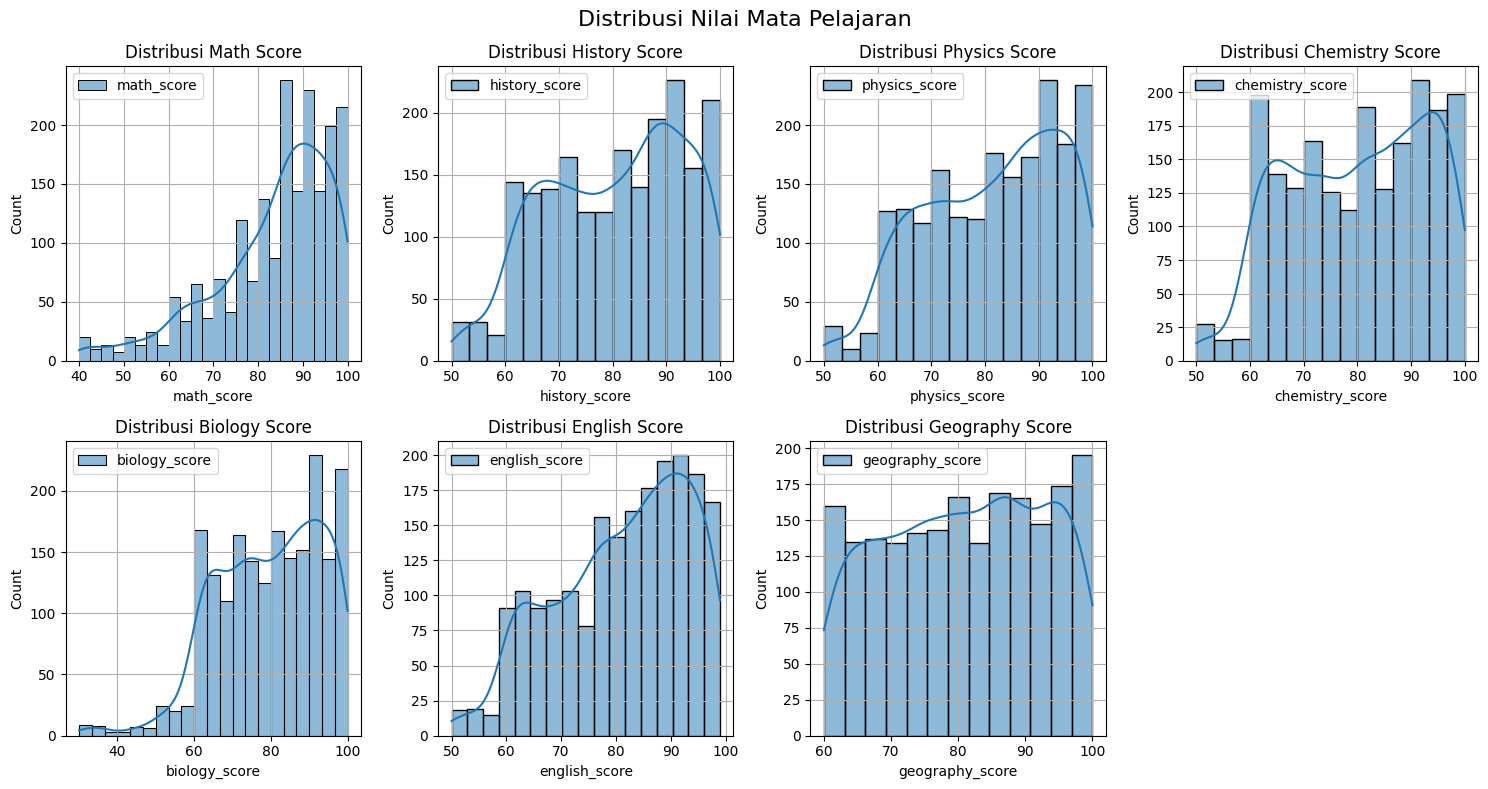

In [7]:
plt.figure(figsize=(15, 8))
for i, subject in enumerate(subjects):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=subject, kde=True, label=subject, alpha=0.5)
    plt.title(f'Distribusi {subject.replace("_", " ").title()}')
    plt.legend()
    plt.grid(True)

plt.suptitle('Distribusi Nilai Mata Pelajaran', fontsize=16)
plt.tight_layout()
plt.show()

- **Perbedaan Distribusi**: Setiap mata pelajaran memiliki distribusi nilai yang berbeda. Ada mata pelajaran yang nilai siswanya cenderung lebih tinggi (terlihat dari puncak kurva yang lebih condong ke kanan), dan ada pula yang lebih rendah. Ini mengindikasikan tingkat kesulitan atau minat siswa yang berbeda terhadap masing-masing mata pelajaran.

- **Kinerja Siswa**: Secara sekilas bagaimana kinerja siswa secara keseluruhan pada setiap mata pelajaran. Misalnya, jika ada banyak siswa yang mendapatkan nilai di bawah rata-rata pada suatu mata pelajaran, maka perlu dilakukan evaluasi lebih lanjut terkait materi, metode pengajaran, atau faktor lain yang mungkin mempengaruhi.

- **Outlier**: Ada beberapa nilai yang terlihat jauh dari kelompok data lainnya (outlier). Ini bisa menjadi indikasi adanya kemungkinan faktor khusus yang mempengaruhi nilai siswa tersebut.

- **Kemungkinan Distribusi Normal**: Beberapa distribusi nilai terlihat mendekati distribusi normal (bentuk kurva lonceng), namun ada juga yang tidak. Ini bisa menjadi acuan untuk memilih metode statistik yang tepat dalam analisis lebih lanjut.

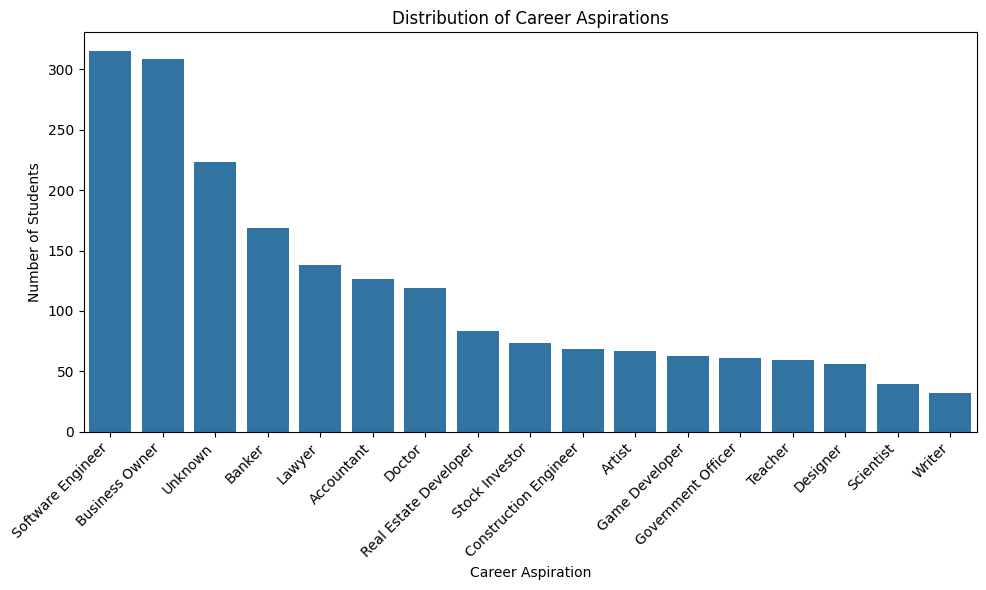

In [8]:
career_counts = df['career_aspiration'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=career_counts.index, y=career_counts.values)
plt.xlabel('Career Aspiration')
plt.ylabel('Number of Students')
plt.title('Distribution of Career Aspirations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- **Pilihan Karir Populer**: Aspirasi karir yang paling populer di antara siswa adalah menjadi seorang Software Engineer. Hal ini menunjukkan minat yang tinggi terhadap bidang teknologi dan pemrograman.

- **Minat Bisnis**: Pilihan karir sebagai Business Owner juga cukup tinggi, menunjukkan minat siswa untuk memulai bisnis sendiri atau menjadi seorang pengusaha.

- **Profesi Tradisional**: Profesi-profesi tradisional seperti Lawyer, Doctor, dan Teacher masih menjadi pilihan yang cukup populer.

- **Pilihan Karir yang Lebih Spesifik**: Selain profesi-profesi umum, visualisasi ini juga menunjukkan adanya minat pada profesi yang lebih spesifik seperti Game Developer, Stock Investor, dan Real Estate Developer.

- **Jumlah Siswa yang Belum Tahu**: Ada sejumlah siswa yang belum memiliki aspirasi karir yang jelas (terlihat pada kategori "Unknown").

### Boxplot

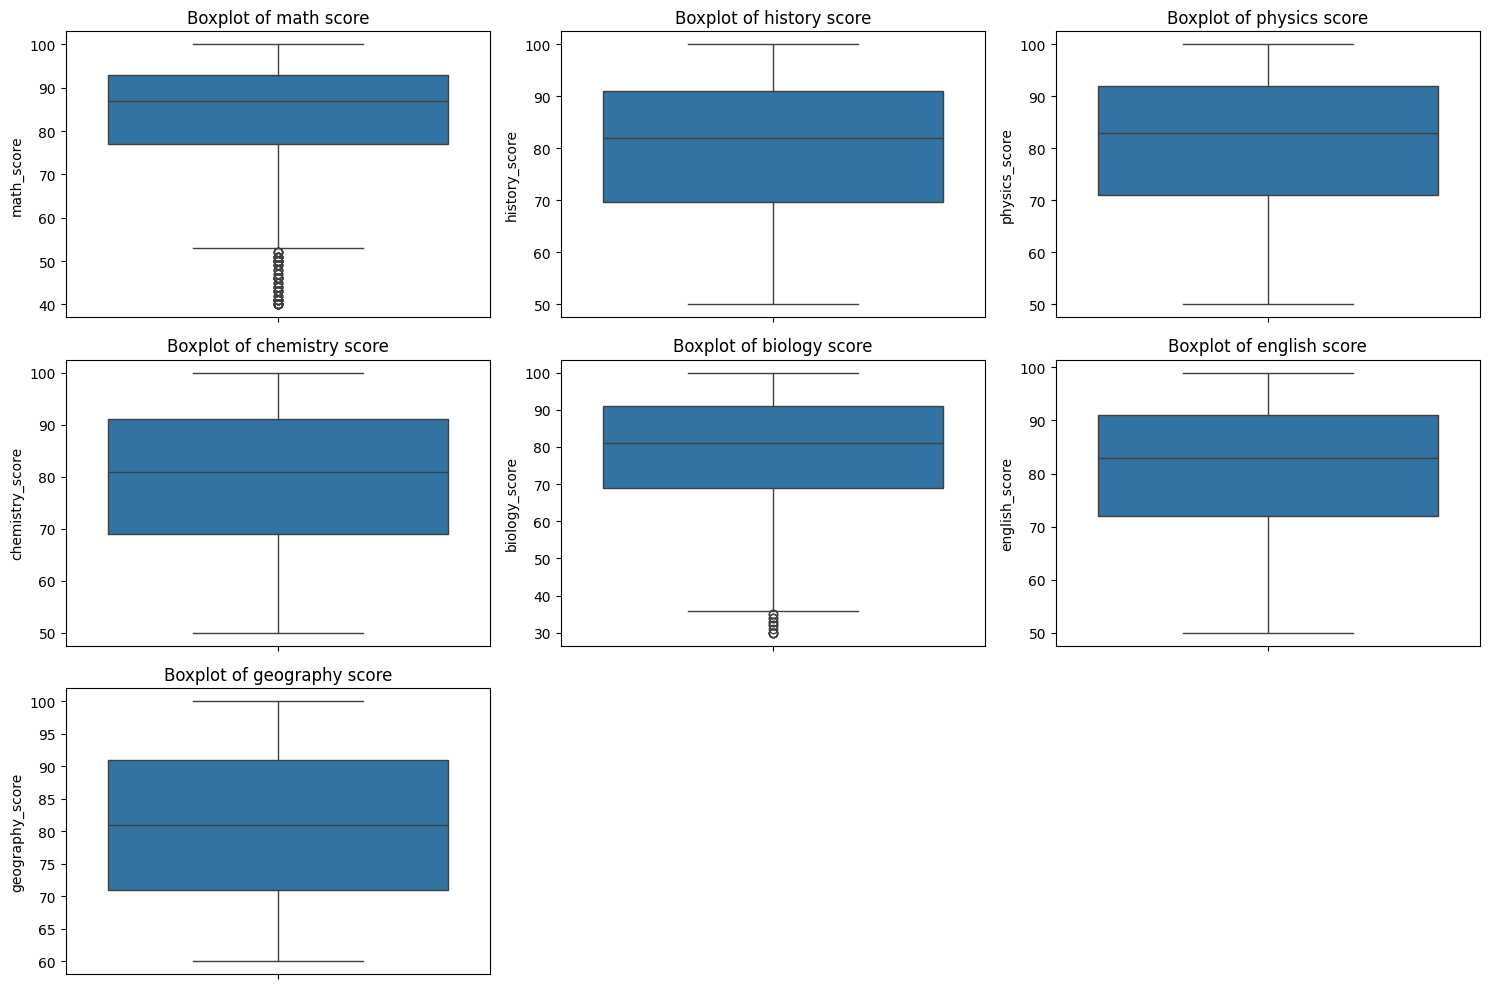

In [9]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df[subjects].columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.replace("_", " ")}')

plt.tight_layout()
plt.show()

- **Kuartil**: Garis tengah kotak mewakili median (nilai tengah). Batas bawah kotak menunjukkan kuartil pertama (25% data di bawah nilai ini), dan batas atas kotak menunjukkan kuartil ketiga (75% data di bawah nilai ini). Jarak antara kuartil pertama dan ketiga disebut rentang interkuartil (IQR), yang memberikan gambaran tentang sebaran nilai di tengah-tengah data.

- **Jangkauan**: Garis-garis yang memanjang dari kotak (whisker) menunjukkan jangkauan data yang masih dianggap wajar. Data yang berada di luar jangkauan ini dianggap sebagai outlier.

- **Outlier**: Titik-titik yang berada di luar whisker adalah outlier, yaitu nilai yang jauh berbeda dari data lainnya.

### Korelasi variabel

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

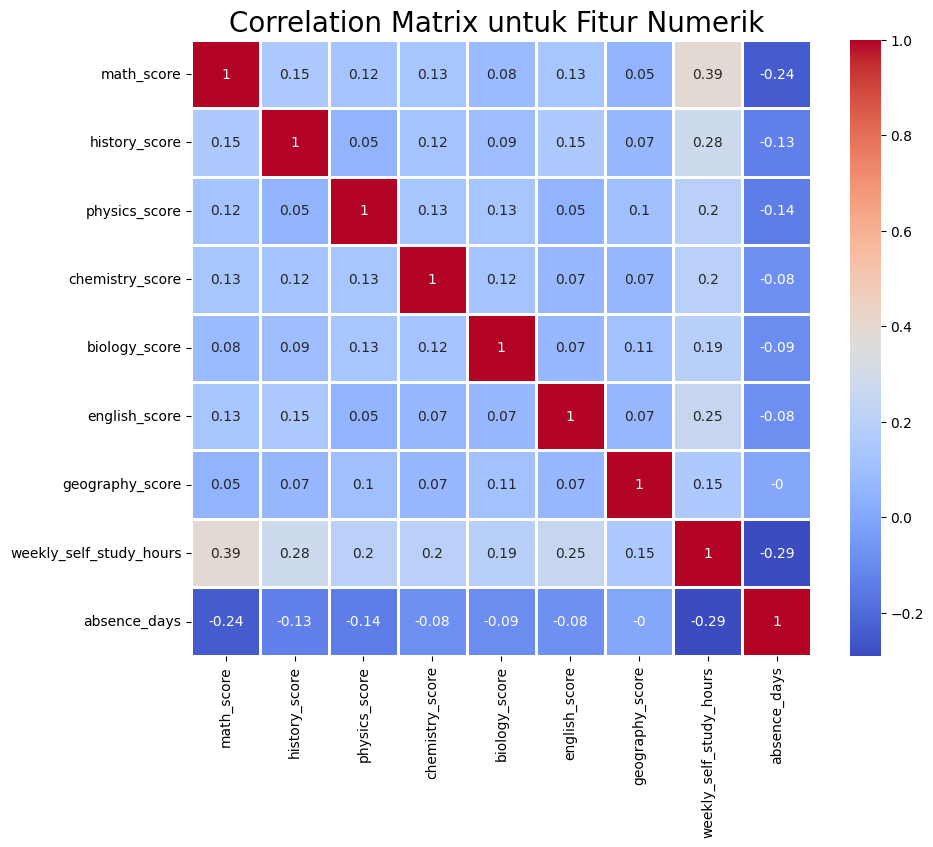

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[subjects + ["weekly_self_study_hours", "absence_days"]].corr().round(2)

# Untuk print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

- **Korelasi positif antara jam belajar mandiri dan skor mata pelajaran**:

  `Weekly_self_study_hours` memiliki korelasi positif dengan `math_score` (0.39), `history_score` (0.28), dan mata pelajaran lainnya, menunjukkan bahwa semakin sering siswa belajar mandiri, semakin tinggi nilai mereka.

- **Korelasi negatif antara ketidakhadiran dan skor mata pelajaran**:

  `absence_days` memiliki korelasi negatif dengan hampir semua skor mata pelajaran (terutama `math_score` -0.24 dan `weekly_self_study_hours` -0.29). Ini menunjukkan bahwa semakin sering siswa absen, semakin rendah nilai mereka.

- **Korelasi antar mata pelajaran relatif rendah**:

  Tidak ada korelasi yang sangat kuat antara satu mata pelajaran dengan lainnya, menunjukkan bahwa performa siswa dalam satu subjek tidak selalu mencerminkan performa di subjek lain.

## Data Preprocessing

In [11]:
features = subjects.copy() + ["weekly_self_study_hours", "absence_days", "career_aspiration"]

features

['math_score',
 'history_score',
 'physics_score',
 'chemistry_score',
 'biology_score',
 'english_score',
 'geography_score',
 'weekly_self_study_hours',
 'absence_days',
 'career_aspiration']

### Miss Value

In [12]:
# Check missing values
print(df.isnull().sum())

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


Tidak ada miss value

### Check Duplicates

In [13]:
duplicates = df[df.duplicated()]

print(f"Duplicated: {duplicates}")

Duplicated: Empty DataFrame
Columns: [id, first_name, last_name, email, gender, part_time_job, absence_days, extracurricular_activities, weekly_self_study_hours, career_aspiration, math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score]
Index: []


Tidak ada duplikat pada dataset

## Data Preparation

### Normalisasi Nilai Mata Pelajaran

Menormalisasi nilai-nilai numerik pada kolom-kolom tertentu dalam sebuah DataFrame menggunakan metode Min-Max Scaler. Normalisasi ini akan mengubah nilai-nilai menjadi rentang antara 0 dan 1, sehingga semua fitur memiliki skala yang sama.

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Normalize scores
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[subjects].values)

In [15]:
df_normalized = pd.DataFrame(normalized, columns=subjects)

df_normalized.describe()

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.724200,0.606640,0.626730,0.599900,0.708307,0.638316,0.522200
std,0.220415,0.254721,0.250789,0.255558,0.196031,0.245451,0.290943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.616667,0.395000,0.420000,0.380000,0.557143,0.448980,0.275000
50%,0.783333,0.640000,0.660000,0.620000,0.728571,0.673469,0.525000
75%,0.883333,0.820000,0.840000,0.820000,0.871429,0.836735,0.775000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TF-IDF Vektorisasi

Melakukan proses vektorisasi TF-IDF pada kolom 'career_aspiration' dari sebuah DataFrame.

- **Membuat Objek TfidfVectorizer**:
  - `tfidf = TfidfVectorizer(stop_words='english')`
  - Baris ini membuat sebuah objek dari kelas TfidfVectorizer. Objek ini akan digunakan untuk mengubah teks menjadi vektor numerik menggunakan teknik TF-IDF. Parameter stop_words='english' menginstruksikan agar kata-kata stop dalam bahasa Inggris (seperti "the", "and", "is") diabaikan.

- **Mentransformasi Data**:
  - `tfidf_career = tfidf.fit_transform(df['career_aspiration'])`
  - Baris ini melakukan dua hal:
    - `fit`: Melatih objek tfidf pada data yang diberikan. Dalam hal ini, data yang digunakan adalah kolom `career_aspiration` dari DataFrame df. Proses ini akan membangun sebuah kamus (vocabulary) dari semua kata unik yang ada dalam data.
    - `transform`: Mengubah data pelatihan menjadi matriks TF-IDF. Setiap baris dalam matriks mewakili satu dokumen, dan setiap kolom mewakili satu kata dalam kamus. Nilai dalam matriks menunjukkan bobot TF-IDF dari kata tersebut dalam dokumen yang bersangkutan.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengubah kumpulan teks menjadi representasi numerik
tfidf = TfidfVectorizer(stop_words='english')
tfidf_career = tfidf.fit_transform(df['career_aspiration'])

tfidf_career.shape

(2000, 23)

### Kombinasi semua fitur

Membuat matriks fitur yang komprehensif dengan menggabungkan berbagai jenis fitur.

- `feature_matrix = pd.concat([...])`:

  - pd.concat: Fungsi ini dari library Pandas digunakan untuk menggabungkan beberapa DataFrame menjadi satu DataFrame baru.
  - [...]: Di dalam tanda kurung, untuk mendefinisikan DataFrame-DataFrame yang akan digabungkan.

- `df_normalized`:

  - Dianggap sebagai DataFrame yang telah dinormalisasi sebelumnya. Ini berisi fitur-fitur numerik yang telah diubah skalanya agar memiliki rentang yang sama.

- `pd.DataFrame(tfidf_career.toarray())`:

  - Mengubah matriks TF-IDF (yang biasanya berbentuk sparse matrix) menjadi DataFrame Pandas. Matriks TF-IDF ini kemungkinan dihasilkan dari proses vektorisasi teks seperti yang dijelaskan sebelumnya.

- `df['weekly self study hours'] / 50`:

  - Mengambil kolom 'weekly self study hours' dari DataFrame df dan membaginya dengan 50. Ini kemungkinan merupakan normalisasi tambahan untuk fitur ini, mengingat 50 mungkin merupakan nilai maksimum atau batas atas dari jumlah jam belajar mandiri.

- `1 - (df['absence days'] / 10)`:

  - Menghitung penalti absensi. Nilai absensi dibagi dengan 10 (mungkin nilai maksimum hari absen) kemudian dikurangkan dari 1. Semakin banyak hari absen, nilai penalti akan semakin mendekati 0.

- `axis=1, ignore_index=True`:

  - `axis=1`: Menggabungkan DataFrame secara horizontal (baris demi baris).
  - `ignore_index=True`: Mengabaikan indeks dari DataFrame yang digabungkan dan membuat indeks baru untuk DataFrame hasil penggabungan.

- `feature_matrix.shape`:
  - Menampilkan dimensi dari matriks fitur yang telah dibuat.

Menggabungkan berbagai jenis fitur untuk membangun matriks fitur yang dapat digunakan dalam model

In [17]:
feature_matrix = pd.concat([
    df_normalized,
    pd.DataFrame(tfidf_career.toarray()),
    df['weekly_self_study_hours'] / 50,  # Normalisasi tambahan
    1 - (df['absence_days'] / 10)        # Penalti absen
], axis=1, ignore_index=True)

feature_matrix.shape

(2000, 32)

### Train Test Split

Melakukan pembagian data menjadi data latih (train data) dan data uji (test data), serta memisahkan label dari data fitur:

- `train_data, test_data = train_test_split(feature_matrix, test_size=0.05, random_state=42)`
  - `train_test_split`: Fungsi ini berasal dari library scikit-learn dan digunakan untuk membagi dataset menjadi data latih dan data uji secara acak.
  - `feature_matrix`: Ini adalah matriks fitur yang telah gabungkan sebelumnya.
  - `test_size=0.05`: Menentukan proporsi data yang akan digunakan sebagai data uji, yaitu 5%.
  - `random_state=42`: Menentukan seed untuk generator bilangan acak. Dengan nilai `random_state` yang sama, pembagian data akan selalu sama setiap kali kode dijalankan.

- `train_labels = df.iloc[train_data.index]['subjects']`
  - `train_data.index`: Mendapatkan indeks dari data latih.
  - `df.iloc[train_data.index]['subjects']`: Mengambil baris dari DataFrame df yang sesuai dengan indeks data latih, dan kemudian mengambil kolom 'subjects'. Ini berarti mengambil label (nilai subjek) yang sesuai dengan data latih.

- `test_labels = df.iloc[test_data.index]['subjects']`: Sama seperti baris sebelumnya, tetapi untuk data uji.

- `train_data.shape, train_data.shape`: Menampilkan dimensi dari data latih. Output (1900, 32) menunjukkan bahwa ada 1900 sampel data dengan 32 fitur.

Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.


In [18]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(feature_matrix, test_size=0.05, random_state=42)

train_labels = df.iloc[train_data.index][subjects]
test_labels = df.iloc[test_data.index][subjects]

train_data.shape, train_data.shape

((1900, 32), (1900, 32))

## Modeling

### Fungsi recommend_subjects

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_subjects(input_scores, weekly_self_study_hours, absence_days, career_aspiration, top_n=3):
    """
    Algoritma:
      1. Preprocessing input: Normalisasi nilai ujian dan vektorisasi aspirasi karir menggunakan TF-IDF.
      2. Menggabungkan semua fitur menjadi satu vektor.
      3. Menghitung kemiripan antara vektor input dengan vektor siswa lain.
      4. Mengambil indeks siswa dengan kemiripan tertinggi.
      5. Menghitung rata-rata nilai mata pelajaran dari siswa-siswa tersebut.
      6. Mengembalikan rekomendasi mata pelajaran.

    Argumen:
        input_scores: List of scores for each subject.
        weekly_self_study_hours: Number of hours spent studying per week.
        absence_days: Number of days absent.
        career_aspiration: A text describing the student's career aspiration.
        top_n: Number of subjects to recommend.

    Returns:
        A dictionary of recommended subjects and their average scores.
    """


    # 1. Preprocess input
    # Normalisasi skor mata pelajaran
    input_scores = scaler.transform([input_scores])

    # TF-IDF untuk career_aspiration
    career_vector = tfidf.transform([career_aspiration]).toarray()

    # Penyesuaian weekly study dan absence
    study_adjustment = weekly_self_study_hours / 50
    absence_penalty = 1 - (absence_days / 10)

    # 2. Gabungkan semua fitur input
    input_features = np.concatenate([
        input_scores.flatten(),
        career_vector.flatten(),
        [study_adjustment],
        [absence_penalty]
    ]).reshape(1, -1)

    # 3. Hitung similarity dengan semua siswa
    cosine_sim = cosine_similarity(input_features, train_data)

    # 4. Ambil indeks siswa teratas
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[:top_n]]

    # 5. Hitung rata-rata skor mata pelajaran dari siswa teratas
    recommended_subjects = df.iloc[top_indices][subjects].mean().sort_values(ascending=False)

    return recommended_subjects.head(3).to_dict()

## Evaluasi Model

In [20]:
def delete_prefix(string, prefix=""):
    return string.replace(prefix, "")

### Test Sistem Rekomendasi

In [21]:
# Contoh input nilai mata pelajaran dan aspirasi karir
math_score = 90
history_score = 50
physics_score = 80
chemistry_score = 78
biology_score = 70
english_score = 80
geography_score = 70

weekly_self_study_hours = 30
absence_days = 0

career_aspiration = "Software Engineer"
# career_aspiration = "Lawyer"

# Gabungkan semua input menjadi satu list
input_scores = [
    math_score,
    history_score,
    physics_score,
    chemistry_score,
    biology_score,
    english_score,
    geography_score,
]

# Panggil fungsi rekomendasi dengan input yang telah disiapkan
recommendation_subjects = recommend_subjects(input_scores, weekly_self_study_hours, absence_days, career_aspiration, top_n=3)

# Format output rekomendasi
recommendation_subjects = [delete_prefix(subject, "_score") for subject in recommendation_subjects]

print(f"Recommended subjects: {recommendation_subjects}")

Recommended subjects: ['math', 'physics', 'chemistry']


### Test Accuracy

Membuat sebuah DataFrame kosong yang akan digunakan untuk menyimpan metrik evaluasi model

In [22]:
df_accuracy = pd.DataFrame(columns=['test'], index=['Precision', 'Recall', 'F1-Score'])

Fungsi ini bertujuan untuk mengevaluasi seberapa baik sistem rekomendasi dalam memprediksi mata pelajaran yang diminati siswa. Evaluasi dilakukan dengan membandingkan mata pelajaran yang direkomendasikan dengan mata pelajaran aktual yang oleh siswa.

In [23]:
def evaluate_recommendations(test_data, train_data, train_labels, top_n=3):
    results = []
    for i, test_student in enumerate(test_data):
        # Hitung similarity antara test_student dan semua siswa di training set
        sim_scores = cosine_similarity([test_student], train_data)[0]

        # Ambil indeks siswa teratas
        top_indices = sim_scores.argsort()[-top_n:][::-1]

        # Hitung rata-rata skor mata pelajaran dari siswa teratas
        recommended_subjects = train_labels.iloc[top_indices].mean().sort_values(ascending=False)

        # Bandingkan dengan skor aktual siswa testing
        actual_subjects = test_labels.iloc[i].sort_values(ascending=False)

        # Simpan hasil
        results.append({
            "recommended": recommended_subjects.index.tolist(),
            "actual": actual_subjects.index.tolist()
        })

    return results

In [24]:
# Evaluasi model
evaluation_results = evaluate_recommendations(test_data.values, train_data.values, train_labels)

# Output evaluasi
for i, result in enumerate(evaluation_results):
    print(f"Test Student {i+1}:")
    print(f"- Rekomendasi: {result['recommended']}")
    print(f"- Aktual: {result['actual']}")
    print()

Test Student 1:
- Rekomendasi: ['biology_score', 'chemistry_score', 'math_score', 'physics_score', 'history_score', 'english_score', 'geography_score']
- Aktual: ['math_score', 'chemistry_score', 'biology_score', 'history_score', 'physics_score', 'english_score', 'geography_score']

Test Student 2:
- Rekomendasi: ['physics_score', 'math_score', 'english_score', 'chemistry_score', 'biology_score', 'geography_score', 'history_score']
- Aktual: ['english_score', 'chemistry_score', 'physics_score', 'math_score', 'biology_score', 'history_score', 'geography_score']

Test Student 3:
- Rekomendasi: ['english_score', 'math_score', 'biology_score', 'chemistry_score', 'physics_score', 'history_score', 'geography_score']
- Aktual: ['english_score', 'chemistry_score', 'math_score', 'biology_score', 'geography_score', 'physics_score', 'history_score']

Test Student 4:
- Rekomendasi: ['physics_score', 'chemistry_score', 'biology_score', 'history_score', 'geography_score', 'english_score', 'math_scor

#### Precision

- `calculate_precision_at_k(evaluation_results, k=3)`: Ini adalah fungsi utama yang menerima dua argumen:
  - `evaluation_results`: List yang berisi hasil evaluasi sistem rekomendasi, di mana setiap elemen berisi dictionary dengan kunci 'recommended' (item yang direkomendasikan) dan 'actual' (item yang sebenarnya).
  - `k`: Jumlah item teratas yang dipertimbangkan dalam perhitungan precision (defaultnya 3).

- `precisions = []`: Inisialisasi list untuk menyimpan nilai precision untuk setiap hasil evaluasi.

- `for result in evaluation_results:`: Melakukan iterasi untuk setiap hasil evaluasi.

- `recommended = set(result['recommended'][:k])`: Mengambil `k` item teratas yang direkomendasikan dan mengubahnya menjadi set.

- `actual = set(result['actual'][:k])`: Mengambil `k` item teratas yang sebenarnya dan mengubahnya menjadi set.

- `precision = len(recommended.intersection(actual)) / k`: Menghitung precision untuk satu hasil evaluasi dengan membagi jumlah item yang direkomendasikan dan sebenarnya yang sama dengan `k`.

- `precisions.append(precision)`: Menambahkan nilai precision ke dalam list precisions.

- `return sum(precisions) / len(precisions)`: Mengembalikan rata-rata nilai precision dari semua hasil evaluasi.

Fungsi ini bertujuan untuk mengukur seberapa akurat sistem rekomendasi dalam merekomendasikan item yang relevan bagi pengguna. Precision at k mengukur proporsi item yang direkomendasikan dalam `k` item teratas yang sebenarnya relevan.

In [25]:
def calculate_precision_at_k(evaluation_results, k=3):
    precisions = []
    for result in evaluation_results:
        recommended = set(result['recommended'][:k])
        actual = set(result['actual'][:k])
        precision = len(recommended.intersection(actual)) / k
        precisions.append(precision)
    return sum(precisions) / len(precisions)

precision_at_3 = calculate_precision_at_k(evaluation_results, k=3)
df_accuracy.loc['Precision', 'test'] = f"{precision_at_3 * 100:.2f}%"

#### Recall

- `calculate_recall_at_k(evaluation_results, k=3)`: Ini adalah fungsi utama yang menerima dua argumen:
  - `evaluation_results`: List yang berisi hasil evaluasi sistem rekomendasi, di mana setiap elemen berisi dictionary dengan kunci 'recommended' (item yang direkomendasikan) dan 'actual' (item yang sebenarnya).
  - `k`: Jumlah item teratas yang dipertimbangkan dalam perhitungan recall (defaultnya 3).

- `recalls = []`: Inisialisasi list untuk menyimpan nilai recall untuk setiap hasil evaluasi.

- `for result in evaluation_results:`: Melakukan iterasi untuk setiap hasil evaluasi.

- `recommended = set(result['recommended'][:k])`: Mengambil `k` item teratas yang direkomendasikan dan mengubahnya menjadi set.

- `actual = set(result['actual'][:k])`: Mengambil `k` item teratas yang sebenarnya dan mengubahnya menjadi set.

- `recall = len(recommended.intersection(actual)) / len(actual) if len(actual) > 0 else 0`: Menghitung recall untuk satu hasil evaluasi dengan membagi jumlah item yang direkomendasikan dan sebenarnya yang sama dengan jumlah item yang sebenarnya. Jika jumlah item sebenarnya adalah 0, maka recall adalah 0.

- `recalls.append(recall)`: Menambahkan nilai recall ke dalam list recalls.
return sum(recalls) / len(recalls): Mengembalikan rata-rata nilai recall dari semua hasil evaluasi.

Fungsi ini bertujuan untuk mengukur seberapa baik sistem rekomendasi dalam menemukan semua item yang relevan bagi pengguna. Recall at k mengukur proporsi item yang direkomendasikan dalam `k` item teratas dari semua item yang sebenarnya relevan.

In [26]:
def calculate_recall_at_k(evaluation_results, k=3):
    recalls = []
    for result in evaluation_results:
        recommended = set(result['recommended'][:k])
        actual = set(result['actual'][:k])
        recall = len(recommended.intersection(actual)) / len(actual) if len(actual) > 0 else 0
        recalls.append(recall)
    return sum(recalls) / len(recalls)

recall_at_3 = calculate_recall_at_k(evaluation_results, k=3)
df_accuracy.loc['Recall', 'test'] = f"{recall_at_3 * 100:.2f}%"

#### F1-Score

- `calculate_f1_at_k(evaluation_results, k=3)`: Ini adalah fungsi utama yang menerima dua argumen:
  - `evaluation_results`: List yang berisi hasil evaluasi sistem rekomendasi, di mana setiap elemen berisi dictionary dengan kunci 'recommended' (item yang direkomendasikan) dan 'actual' (item yang sebenarnya).
  - `k`: Jumlah item teratas yang dipertimbangkan dalam perhitungan F1-score (defaultnya 3).

- `f1_scores = []`: Inisialisasi list untuk menyimpan nilai F1-score untuk setiap hasil evaluasi.

- `for result in evaluation_results:`: Melakukan iterasi untuk setiap hasil evaluasi.

- `recommended = set(result['recommended'][:k])`: Mengambil `k` item teratas yang direkomendasikan dan mengubahnya menjadi set.

- `actual = set(result['actual'][:k])`: Mengambil `k` item teratas yang sebenarnya dan mengubahnya menjadi set.

- `true_positives = len(recommended.intersection(actual))`: Menghitung jumlah item yang direkomendasikan dan sebenarnya yang sama (true positives).

- `if true_positives == 0:`: Jika tidak ada true positives, maka F1-score adalah 0.

- `precision = true_positives / len(recommended) if len(recommended) > 0 else 0`: Menghitung precision.

- `recall = true_positives / len(actual) if len(actual) > 0 else 0`: Menghitung recall.

- `f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0`: Menghitung F1-score.

- `f1_scores.append(f1)`: Menambahkan nilai F1-score ke dalam list f1_scores.

- `return sum(f1_scores) / len(f1_scores)`: Mengembalikan rata-rata nilai F1-score dari semua hasil evaluasi.

Fungsi ini bertujuan untuk mengukur keseimbangan antara precision dan recall sistem rekomendasi. F1-score adalah rata-rata harmonik dari precision dan recall, sehingga memberikan ukuran yang mempertimbangkan keduanya.

In [27]:
def calculate_f1_at_k(evaluation_results, k=3):
    f1_scores = []
    for result in evaluation_results:
        recommended = set(result['recommended'][:k])
        actual = set(result['actual'][:k])

        true_positives = len(recommended.intersection(actual))

        if true_positives == 0:
            f1_scores.append(0)
            continue

        precision = true_positives / len(recommended) if len(recommended) > 0 else 0
        recall = true_positives / len(actual) if len(actual) > 0 else 0

        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)

    return sum(f1_scores) / len(f1_scores)

f1_at_3 = calculate_f1_at_k(evaluation_results, k=3)
df_accuracy.loc['F1-Score', 'test'] = f"{f1_at_3 * 100:.2f}%"

In [28]:
df_accuracy

,test
Precision,82.00%
Recall,82.00%
F1-Score,82.00%


Berdasarkan metrik evaluasi ini, model machine learning menunjukkan performa yang baik pada data uji dengan presisi, recall, dan F1-score sebesar 82%. Model ini memiliki kemampuan yang seimbang dalam mengidentifikasi data positif dengan benar dan menemukan sebagian besar data positif yang ada.